## Importing libariers , Reding Data 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Uplod Data
df = pd.read_csv('heart_failure_clinical_records.csv')

In [2]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
corr = df.corr()


<Axes: >

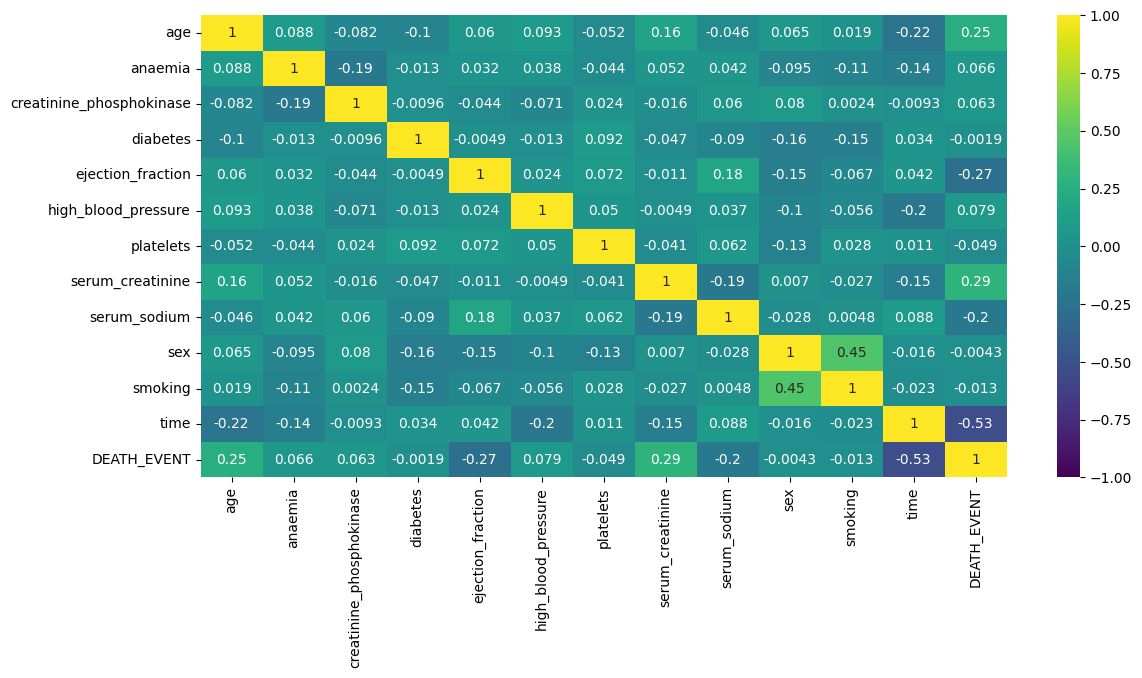

In [6]:
plt.figure(figsize=(13,6))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,cmap= "viridis")

## Chaecking for outliers

<Axes: >

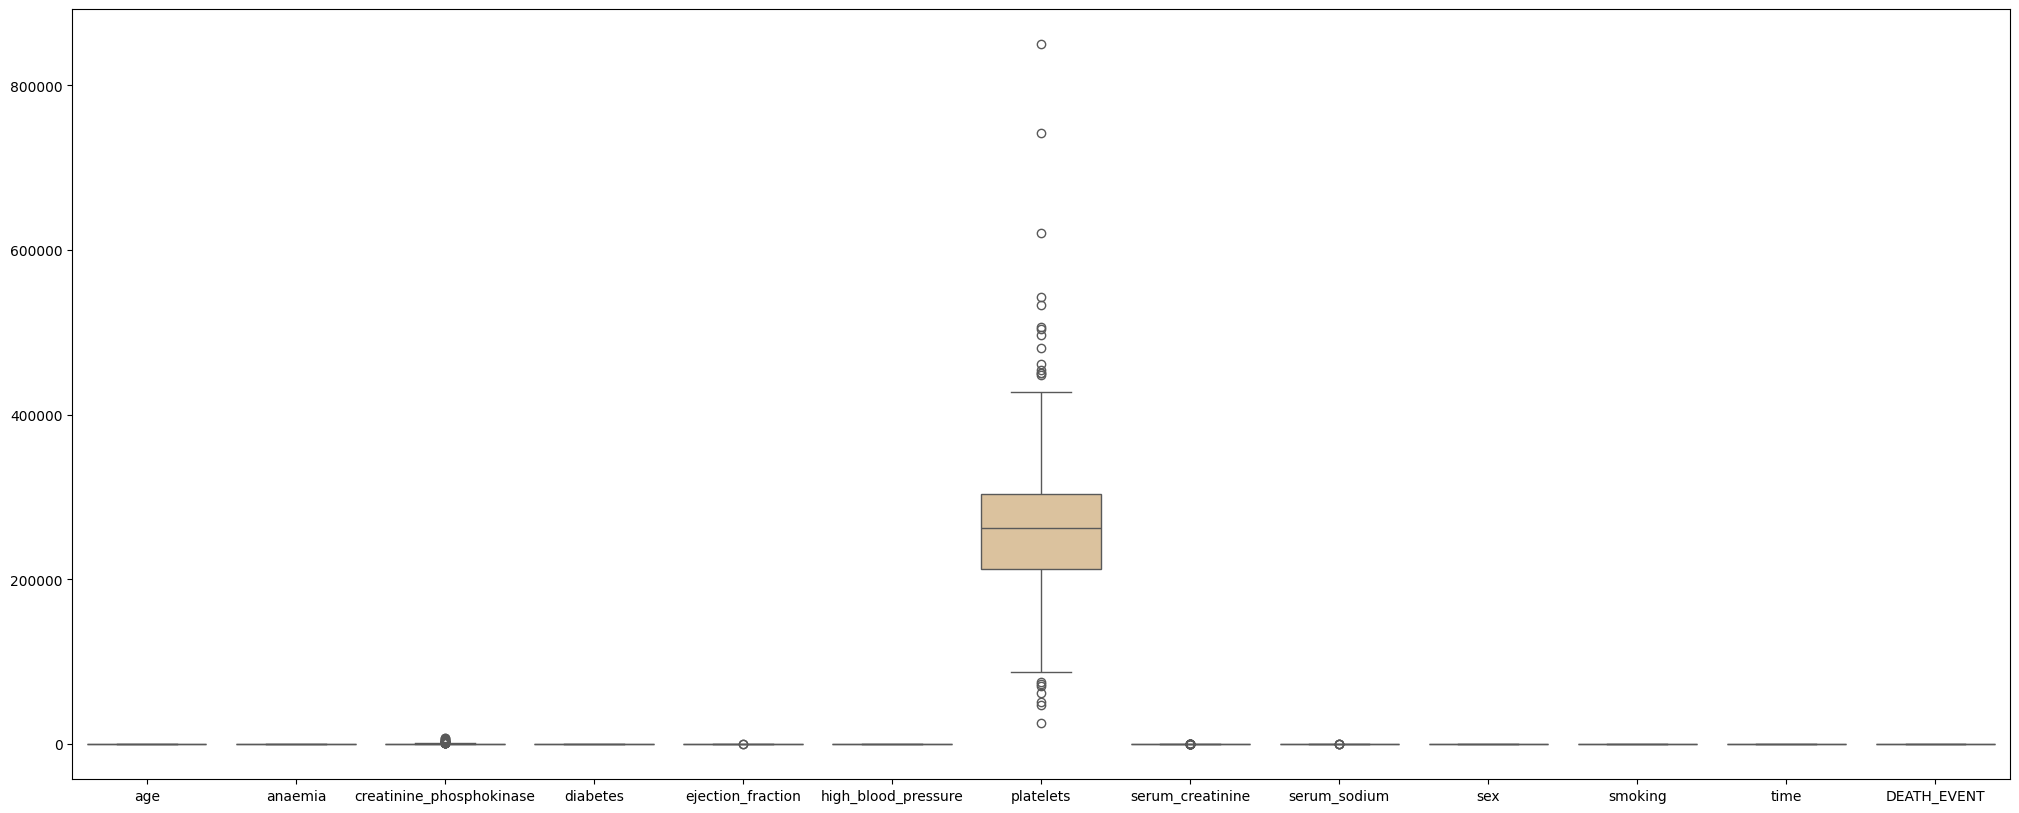

In [7]:
plt.figure(figsize=(25,10))
sns.boxplot(data =df , orient="v",palette ="Set2")

## dealing with outliers using IQR and winsorize techniques

In [8]:
def z_score(df, colum_name):
    x= df[colum_name]
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 -1.5*iqr
    upper_bound = q3 + 1.5*iqr
     
    outliers =(x<lower_bound) | (x>upper_bound)
    
    df_cleaned = df[~outliers]
    
    return df_cleaned
    

In [9]:
def winsorize(df, colum_name,lower_percentile=0.05, upper_percentile=0.95 ):
    x= df[colum_name]
    
    lower_bound = x.quantile(lower_percentile)
    upper_bound = x.quantile(upper_percentile)
    
    winsorized_values = np.clip(x,lower_bound,upper_bound)
    
    df_winsorized = df.copy()
    df_winsorized[colum_name] =  winsorized_values
    
    return df_winsorized

In [10]:
df_cleaned = winsorize(df,"platelets")

In [11]:
df_cleaned = z_score(df_cleaned,"serum_creatinine")

In [12]:
df_cleaned = z_score(df_cleaned,"creatinine_phosphokinase")

In [13]:
df_cleaned = winsorize(df_cleaned,"ejection_fraction")

In [14]:
df_cleaned = winsorize(df_cleaned,"serum_sodium")

In [15]:
df_cleaned

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130.0,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,130.0,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137.0,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132.0,1,1,8,1
6,75.0,1,246,0,20,0,131800.0,1.2,137.0,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139.0,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140.0,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136.0,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143.0,1,1,270,0


<Axes: >

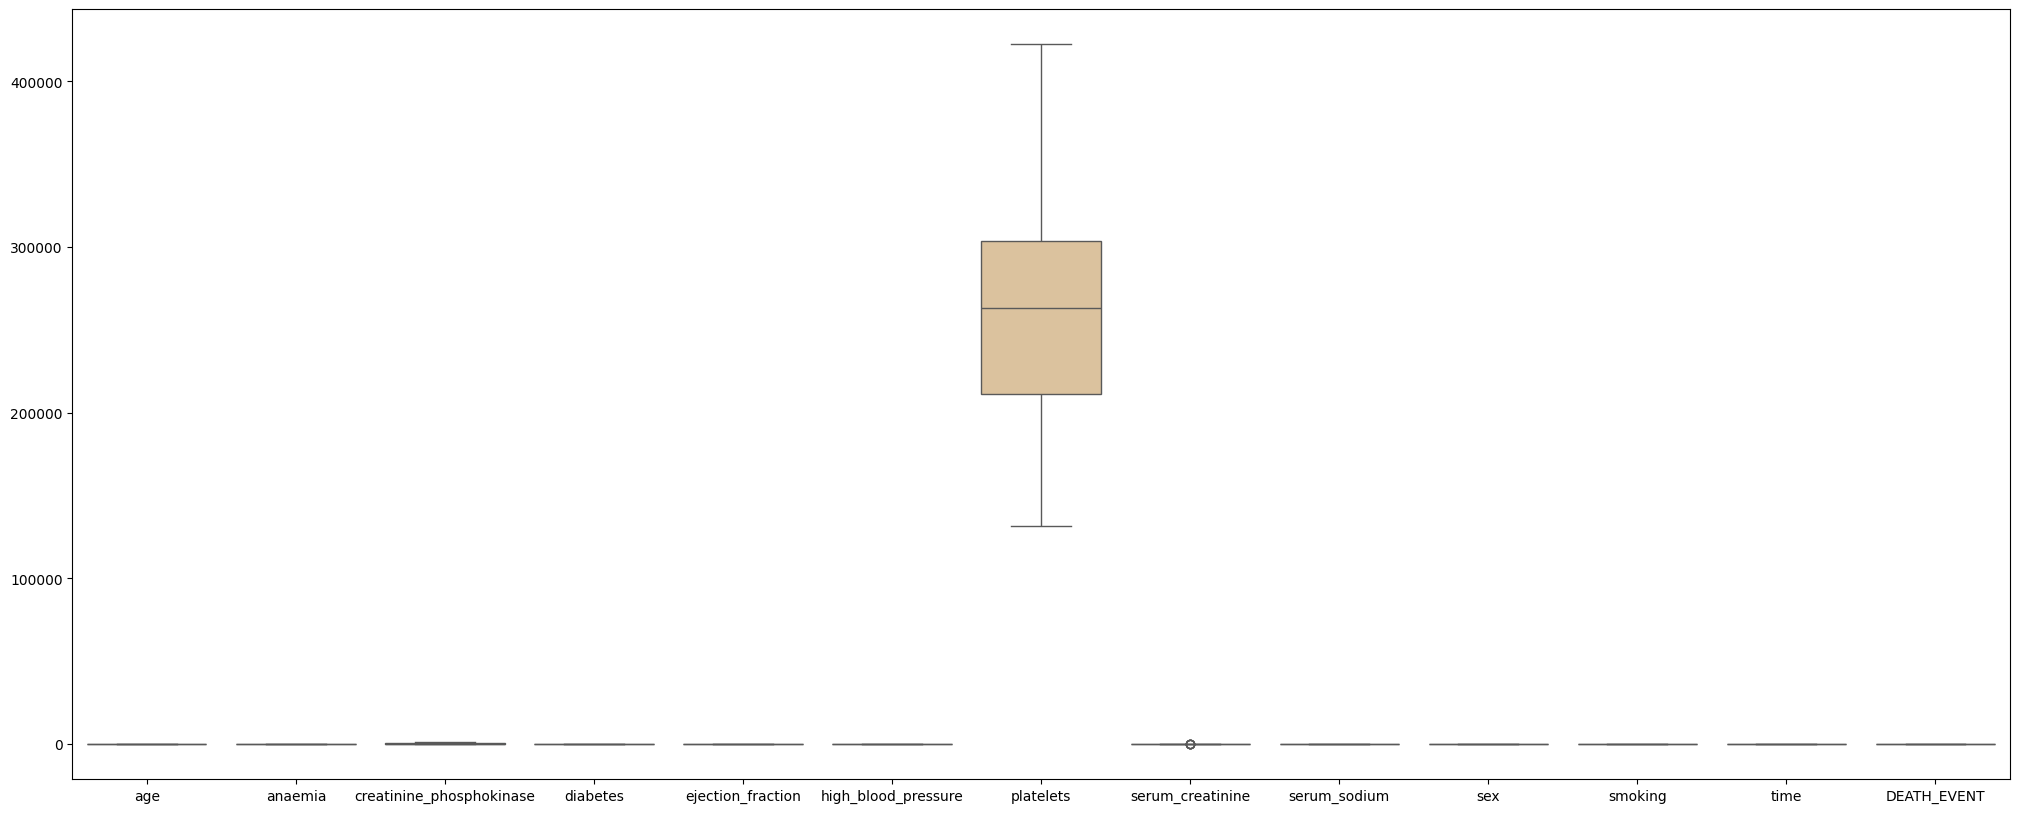

In [16]:
plt.figure(figsize=(25,10))
sns.boxplot(data =df_cleaned , orient="v",palette ="Set2")

## dealing with imbalanced data 

In [17]:
num_0 = (df_cleaned['DEATH_EVENT'] ==0).sum()
num_1 = (df_cleaned['DEATH_EVENT'] ==1).sum()

print("Number of rows with class0" ,num_0 )
print("Number of rows with class1" ,num_1 )

Number of rows with class0 173
Number of rows with class1 70


In [18]:
x = df_cleaned.drop('DEATH_EVENT',axis=1)
y = df_cleaned['DEATH_EVENT']

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state =42)
x_resampled,y_resampled = smote.fit_resample(x,y)

In [20]:
num_0 = (y_resampled ==0).sum()
num_1 = (y_resampled ==1).sum()

print("Number of rows with class0" ,num_0 )
print("Number of rows with class1" ,num_1 )

Number of rows with class0 173
Number of rows with class1 173


## Data Augmentation

In [21]:
data = np.column_stack((x_resampled,y_resampled))

x_balanced =data[:,:-1]
y_balanced =data[:,-1]

num_samples_to_add =600

additional_sample_indices = np.concatenate([
   np.random.choice(np.where(y_balanced==0)[0],num_samples_to_add //2, replace=True),
    np.random.choice(np.where(y_balanced==1)[0],num_samples_to_add //2, replace=True)
    ])

x_augmentated = np.vstack([x_balanced,x_balanced[additional_sample_indices]])
y_augmentated = np.hstack([y_balanced,y_balanced[additional_sample_indices]])

print("Number of samples for after augmentation :")
print("Class 0 :",np.sum(y_augmentated==0))
print("Class 1 :",np.sum(y_augmentated==1))

Number of samples for after augmentation :
Class 0 : 473
Class 1 : 473


In [22]:
# Split train,test  data 
X_train, X_test, y_train, y_test = train_test_split(x_augmentated, y_augmentated, test_size=0.25, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(709, 12)
(237, 12)
(709,)
(237,)


In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 

z_scaler = StandardScaler()
X_train_scaler =z_scaler.fit_transform(X_train)
X_test_scaler =z_scaler.transform(X_test)

## Trianing phase 

## 1-LogisticRegression

In [45]:
#LogisticRegression

logreg = LogisticRegression(max_iter = 2000 ,random_state = 42)
logreg.fit(X_train_scaler, y_train)

y_pred_Logistic_Regressio = logreg.predict(X_test_scaler)

accuarcy = accuracy_score(y_test,y_pred_Logistic_Regressio)

accuarcy

0.8649789029535865

In [46]:
from sklearn.metrics import confusion_matrix 
con_matrix1 = confusion_matrix(y_test,y_pred_Logistic_Regressio)
print("Confusion Matrix For Logistic Regression : ")

print("____"*10)

print("num of Ture Positive : ",con_matrix1[1][1])
print("num of Ture Negative : ",con_matrix1[0][0])
print("num of False Positive : ",con_matrix1[0][1])
print("num of false Negative : ",con_matrix1[1][0])

Confusion Matrix For Logistic Regression : 
________________________________________
num of Ture Positive :  104
num of Ture Negative :  101
num of False Positive :  18
num of false Negative :  14


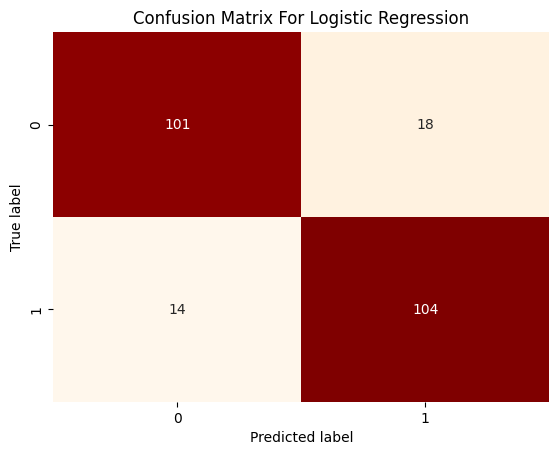

In [47]:
sns.heatmap(con_matrix1,annot =True, fmt='d',cmap='OrRd',cbar=False)
plt.title("Confusion Matrix For Logistic Regression")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2- xgboost

In [41]:
# xgboost

from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train_scaler, y_train)

y_pred_xgb = xgb.predict(X_test_scaler)

accuarcy = accuracy_score(y_test,y_pred_xgb)

accuarcy


0.9451476793248945

In [43]:
con_matrix2 = confusion_matrix(y_test,y_pred_xgb)
print("Confusion Matrix For xgboost : ")

print("____"*10)

print("num of Ture Positive : ",con_matrix2[1][1])
print("num of Ture Negative : ",con_matrix2[0][0])
print("num of False Positive : ",con_matrix2[0][1])
print("num of false Negative : ",con_matrix2[1][0])

Confusion Matrix For xgboost : 
________________________________________
num of Ture Positive :  113
num of Ture Negative :  111
num of False Positive :  8
num of false Negative :  5


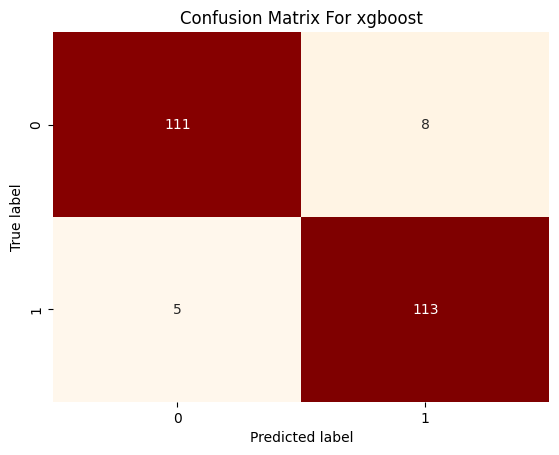

In [44]:
sns.heatmap(con_matrix2,annot =True, fmt='d',cmap='OrRd',cbar=False)
plt.title("Confusion Matrix For xgboost")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 3-Random Forest Classifier

In [33]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier( max_features =8,max_depth = 6, random_state =24  ) 
Random_Forest.fit(X_train_scaler, y_train)

y_pred_Random_Forest = Random_Forest.predict(X_test_scaler)

accuarcy = accuracy_score(y_test,y_pred_Random_Forest)

accuarcy



0.9831223628691983

In [37]:
con_matrix3 = confusion_matrix(y_test,y_pred_Random_Forest)
print("Confusion Matrix For Random Forest : ")

print("____"*10)

print("num of Ture Positive : ",con_matrix3[1][1])
print("num of Ture Negative : ",con_matrix3[0][0])
print("num of False Positive : ",con_matrix3[0][1])
print("num of false Negative : ",con_matrix3[1][0])

Confusion Matrix For Random Forest : 
________________________________________
num of Ture Positive :  116
num of Ture Negative :  117
num of False Positive :  2
num of false Negative :  2


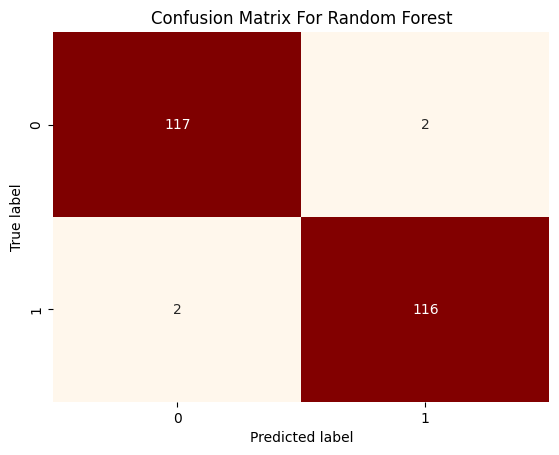

In [40]:
sns.heatmap(con_matrix3,annot =True, fmt='d',cmap='OrRd',cbar=False)
plt.title("Confusion Matrix For Random Forest")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 4- Decision Tree  Classifier: 


In [50]:


from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier( random_state =24 ) 


dtc.fit(X_train_scaler, y_train)

y_pred_dtc = dtc.predict(X_test_scaler)

accuarcy = accuracy_score(y_test,y_pred_dtc)

accuarcy

0.9915611814345991

In [36]:
con_matrix4 = confusion_matrix(y_test,y_pred_dtc)
print("Confusion Matrix For Decision Tree Classifier : ")

print("____"*10)

print("num of Ture Positive : ",con_matrix4[1][1])
print("num of Ture Negative : ",con_matrix4[0][0])
print("num of False Positive : ",con_matrix4[0][1])
print("num of false Negative : ",con_matrix4[1][0])

Confusion Matrix For xgboost : 
________________________________________
num of Ture Positive :  116
num of Ture Negative :  119
num of False Positive :  0
num of false Negative :  2


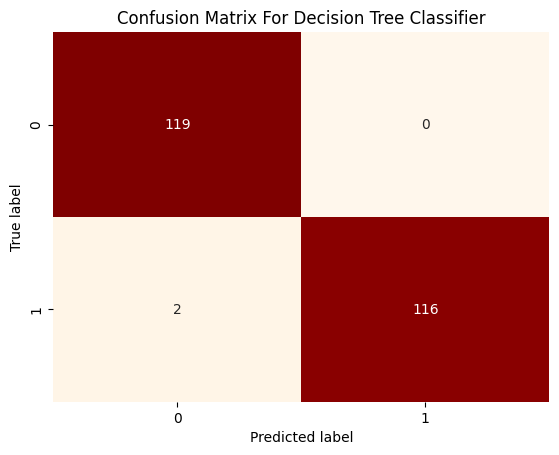

In [39]:
sns.heatmap(con_matrix4,annot =True, fmt='d',cmap='OrRd',cbar=False)
plt.title("Confusion Matrix For Decision Tree Classifier")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

C:\Users\bara7\AppData\Local\Temp\ipykernel_12768\3865989486.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


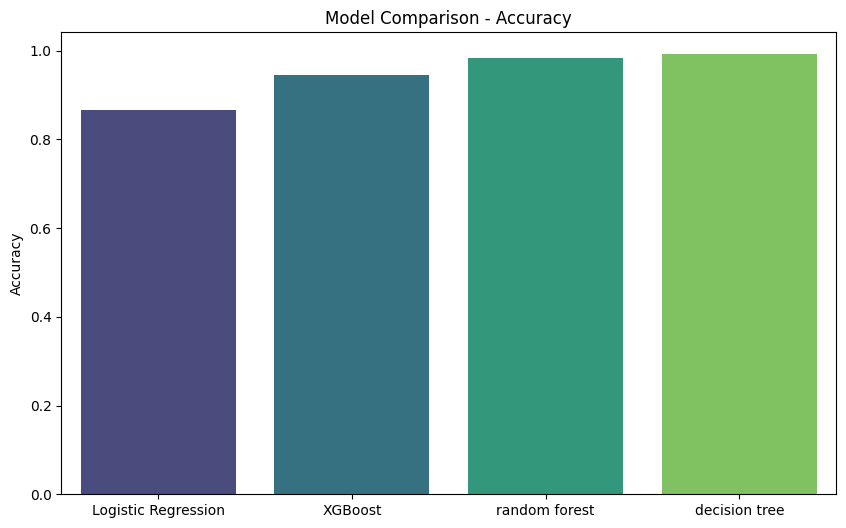

In [52]:
models = [ logreg, xgb , Random_Forest , dtc]
model_names = ['Logistic Regression', 'XGBoost' ,  "random forest",'decision tree']

# Train and evaluate each model
accuracies = []

for current_model in models:
    current_model.fit(X_train_scaler, y_train)

    # Get predictions
    y_pred = current_model.predict(X_test_scaler)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Best Algortihm for this Data is Decision Tree whith

# Accuracy  99.15%